<a href="https://colab.research.google.com/github/GanzB02/Gan_2024F-T3-AML-3104---Neural-Networks-and-Deep-Learning-02-/blob/main/Ganesharow_Bappoo_C0909659_Assignment1_AML3104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1
## 2024F-T3 AML 3104 - Neural Networks and Deep Learning 02 (DSMM Group 2)

### Ganesharow Bappoo - C0909659



# Fire Weather Index Prediction:
 A Comparative Analysis Using Regression Models on the Algerian Forest Fire Dataset



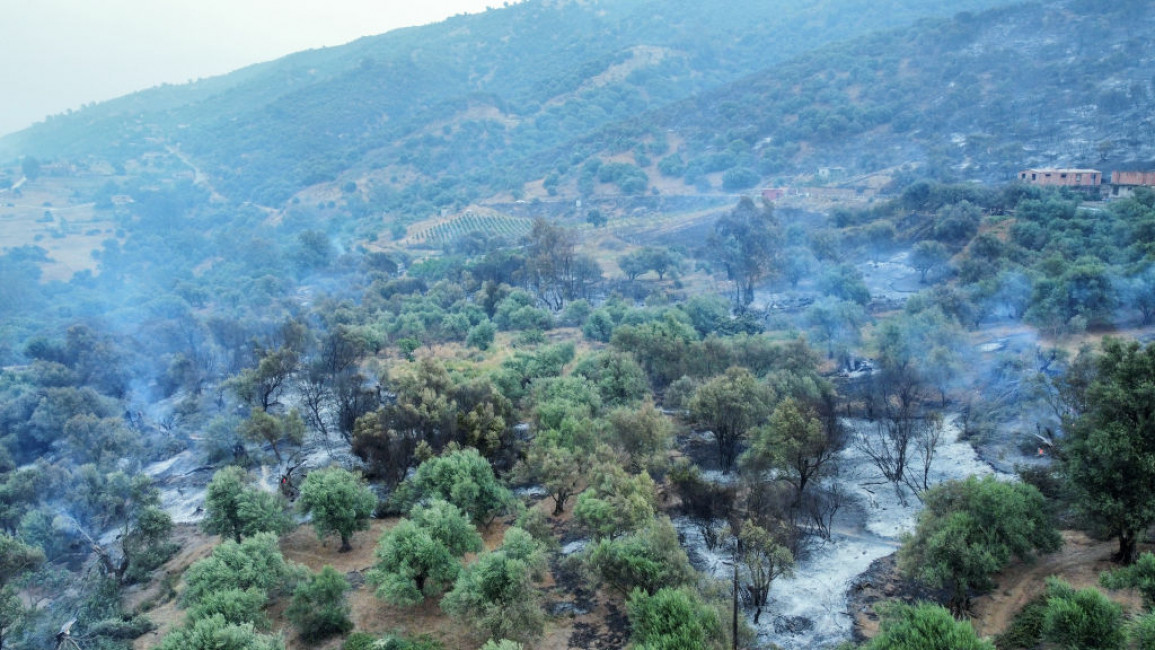

## Introduction:
Forest fires pose a significant threat to both natural ecosystems and human settlements, making accurate prediction of fire risk critical for prevention and management efforts. The Fire Weather Index (FWI) is a key metric used globally to assess the potential for wildfire occurrence based on weather conditions. In this project, we utilize the Algerian forest fire dataset to analyze and predict FWI using various regression models.

The primary objective of this assignment is to clean and process the dataset, visualize the relationships between key variables, and implement predictive models including multiple linear regression, polynomial regression, and regularization techniques like Ridge and Lasso regression. To ensure robust model performance, we perform cross-validation and hyperparameter tuning, testing the final models on unseen data. The insights and models developed in this project aim to aid in the understanding of fire risk factors and improve the accuracy of FWI predictions.






# Importing Libraries


In [ ]:
#Importing necessary libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
import pickle


#Loading the Dataset


In [4]:
#Access the data:
with open('/content/Algerian_forest_fires_cleaned.csv', 'r') as f:
  data = f.read()

In [8]:
import pandas as pd
df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


# 1.0 Data Cleaning and Preprocessing

## Data Cleaning

In [10]:
#Inspect the dataset structure
df.info()

#Checking for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Descriptive statistics for the numerical columns to detect outliers or unusual patterns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
Missing values in each column:
day            0
month          0
year           0
Temperature    0
RH             0
Ws

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [14]:
# Dropping the 'year' column as it provides no useful variation
df = df.drop(columns=['year'])

# Confirm the column is removed
df.head()


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


Dataset has no missing values, we will not remove any information

## Preprocessing
- Convert Categorical Features
 The Classes column, which indicates whether there was a fire or not, is categorical (string). For regression modeling, it has been converted to a numerical format.
- We use the .apply() function with a lambda to transform "fire" into 1 and "not fire" into 0.


In [11]:
#Converting the 'Classes' column to numeric (1 for fire, 0 for not fire)
df['Classes'] = df['Classes'].apply(lambda x: 1 if x.strip() == 'fire' else 0)

# Displaying the first few rows
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


## Feature Selection
- selecting the key weather-related and fire-related features for regression. These include Temperature, RH, Ws, Rain, and various fire indices (FFMC, DMC, DC, ISI, BUI).
- X holds the input features, while y is the target (Fire Weather Index).



In [12]:
# Select the relevant features for regression modeling
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']
X = df[features]
y = df['FWI']  # The target variable


# 2.0 Data Visualization and Observations
Visualizations can help us understand relationships between variables and identify patterns or outliers.

### Correlation Heatmap
A heatmap can show the correlation between various features, giving us insights into which variables are strongly related to FWI (Fire Weather Index).



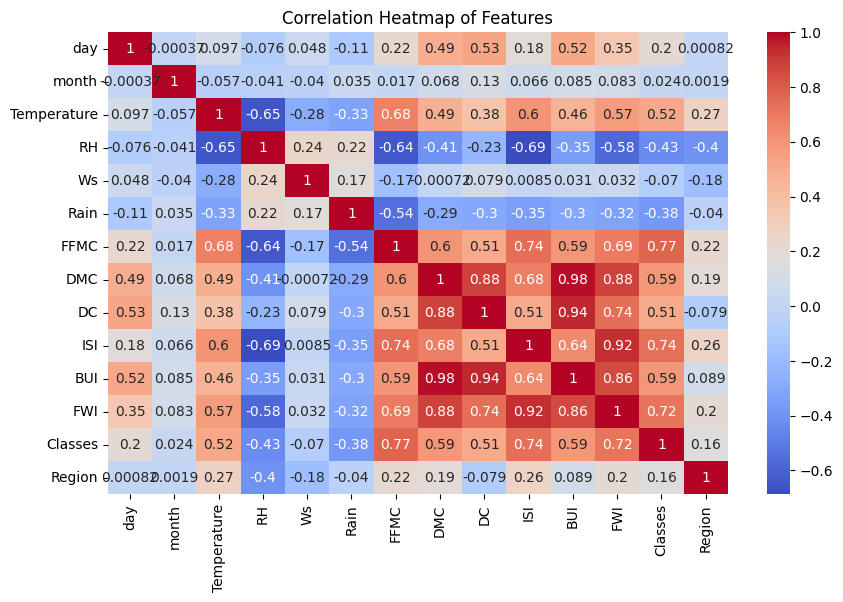

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()

# Creating a heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()




- **Temperature** is positively correlated with **FWI** (0.57), meaning that higher temperatures are associated with higher fire risks.
- **Relative Humidity (RH)** has a strong negative correlation with **FWI** (-0.58), indicating that higher humidity reduces fire risk.
- **Wind Speed (Ws)** has a weaker correlation with **FWI** (0.23), suggesting that wind speed has a lesser, but still positive, impact on fire risk.
- **FFMC (Fine Fuel Moisture Code)** and **FWI** are moderately correlated (0.69), meaning drier fuels contribute to higher fire risk.
- **ISI (Initial Spread Index)** shows a strong positive correlation with **FWI** (0.92), indicating that fire spread rate is a major factor in fire weather index calculations.
- **BUI (Build Up Index)** is highly correlated with **FWI** (0.86), suggesting that both fuel dryness and accumulated fire potential significantly impact fire risk.
- **Rain** shows a weak negative correlation with **FWI** (-0.32), implying that more rain generally reduces fire risk, but the impact is not as strong as other features.

From these insights, **Temperature**, **RH**, **FFMC**, **ISI**, and **BUI** seem to be the most influential factors in predicting FWI.

### Distribution of FWI (Target Variable)

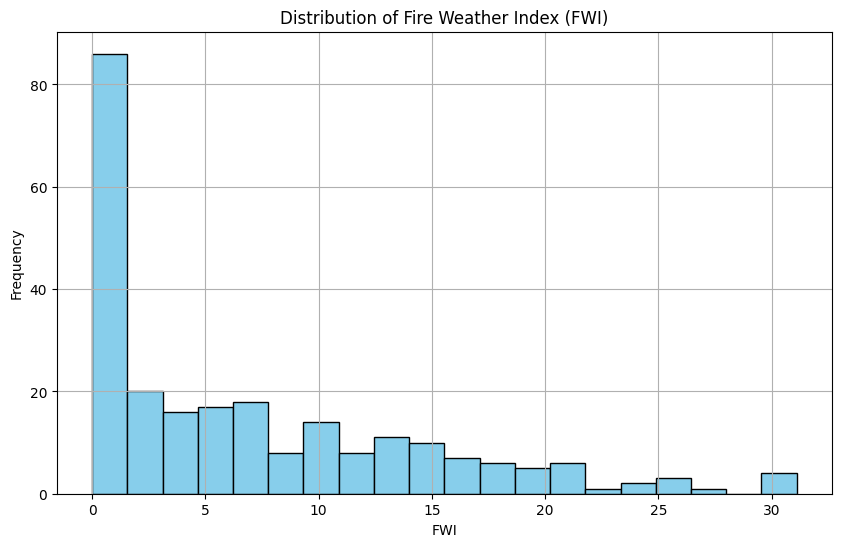

In [16]:
plt.figure(figsize=(10,6))
plt.hist(df['FWI'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Fire Weather Index (FWI)')
plt.xlabel('FWI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


- The **distribution is highly skewed to the left**, with the majority of FWI values concentrated at the lower end, indicating that lower fire risk days are much more frequent in the dataset.
- A large proportion of FWI values fall between **0 and 5**, suggesting that low fire risk conditions are common.
- **Fewer instances** of high FWI values (greater than 15) are observed, implying that extreme fire risk conditions are relatively rare in this dataset.
- This skewed distribution might indicate a need for transformation of the target variable (FWI) if it negatively impacts model performance.

These insights suggest that fire risk tends to be low in most cases, but there are some instances where the FWI can be much higher, representing significant fire hazards.

### Boxplot of FWI (Fire Risk)by Region

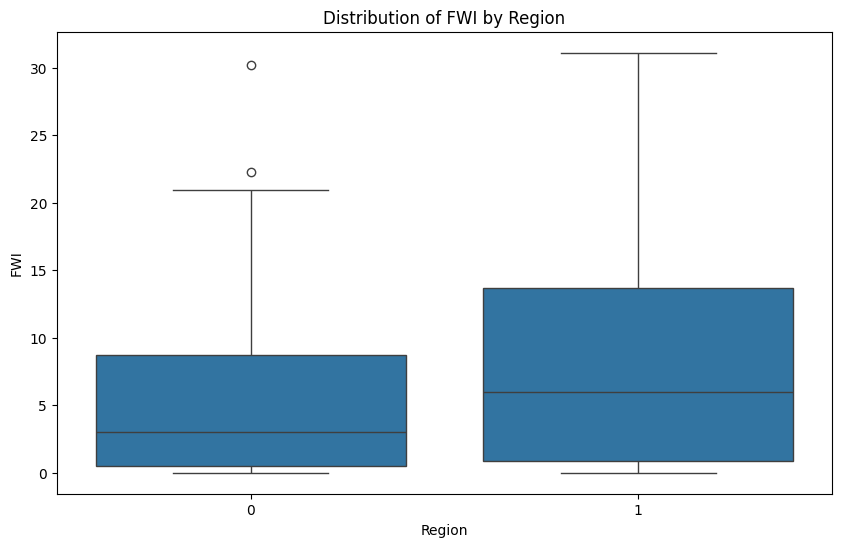

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='FWI', data=df)
plt.title('Distribution of FWI by Region')
plt.xlabel('Region')
plt.ylabel('FWI')
plt.show()


- **Region 1** tends to have higher Fire Weather Index (FWI) values compared to **Region 0**. The median FWI in Region 1 is higher than that of Region 0.
- The **spread (interquartile range)** of FWI in Region 1 is wider than in Region 0, indicating more variability in fire risk conditions in Region 1.
- **Outliers** are present in both regions:
  - In Region 0, there are a few outliers with FWI values above 20.
  - In Region 1, there are no clear outliers, but the range of FWI values extends to around 30.
- **Region 0** tends to have lower FWI values overall, with a few higher values, while **Region 1** has more consistently higher FWI values, indicating that fire risk might be more severe or frequent in Region 1.

This suggests that regional factors may play a significant role in influencing fire weather conditions, and it might be beneficial to include the region in the predictive model.

### Scatter Plot of FWI vs Temperature and Relative Humidity

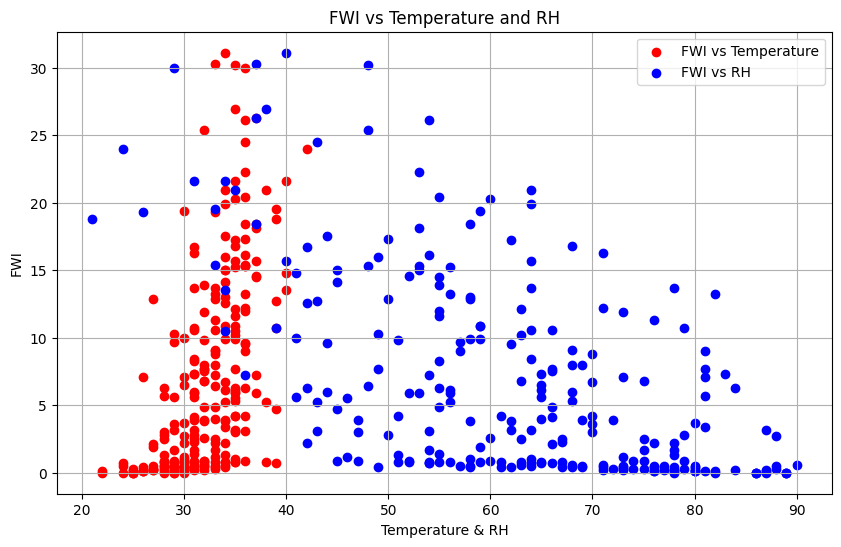

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(df['Temperature'], df['FWI'], color='red', label='FWI vs Temperature')
plt.scatter(df['RH'], df['FWI'], color='blue', label='FWI vs RH')
plt.title('FWI vs Temperature and RH')
plt.xlabel('Temperature & RH')
plt.ylabel('FWI')
plt.legend()
plt.grid(True)
plt.show()



- **Temperature** (in red) shows a clear positive relationship with FWI. As temperature increases, the FWI also tends to increase. Higher temperatures are strongly associated with higher fire risk, especially when temperatures exceed 30°C.
- **Relative Humidity (RH)** (in blue) shows a negative relationship with FWI. As RH increases, the FWI tends to decrease, meaning that higher humidity usually reduces the fire risk.
  - For RH values above 60%, FWI values are mostly low (below 10), indicating that high humidity is linked to a lower risk of fire.
- **Low FWI values** (close to 0) occur across a range of temperatures and humidity levels, suggesting that other factors (such as wind speed or fuel moisture) may also play a role in fire risk.
- **Higher FWI values** (above 15) are primarily observed in scenarios with **high temperature** and **low RH**, reinforcing the idea that hot, dry conditions are most conducive to fire risk.

These insights confirm that **Temperature** and **Relative Humidity** are important factors influencing the Fire Weather Index (FWI) and should be considered critical features in predictive modeling.

### Visual Dashboard

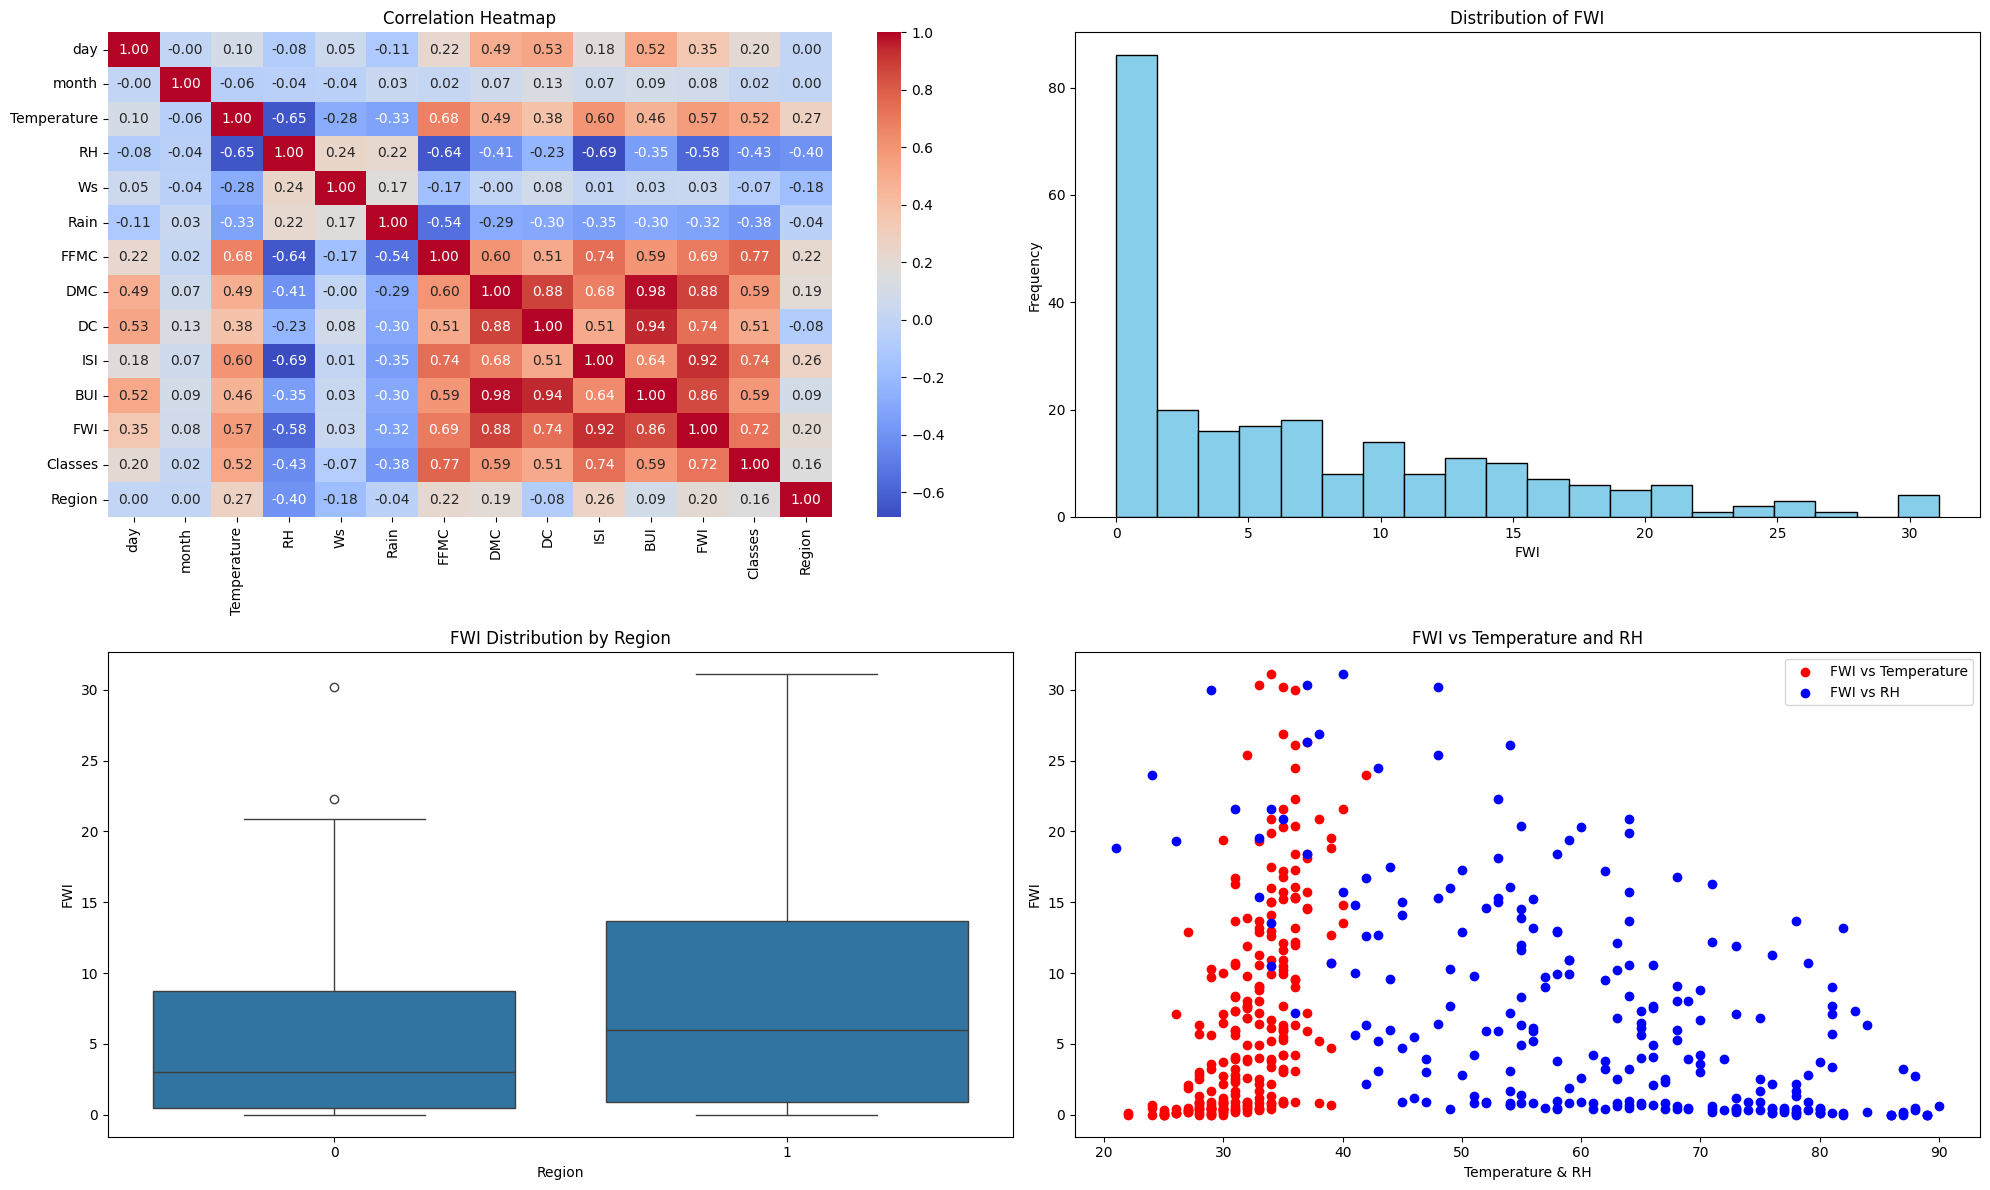

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the entire layout
plt.figure(figsize=(20, 12))

# Subplot 1: Correlation heatmap
plt.subplot(2, 2, 1)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Subplot 2: Distribution of FWI
plt.subplot(2, 2, 2)
plt.hist(df['FWI'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of FWI')
plt.xlabel('FWI')
plt.ylabel('Frequency')

# Subplot 3: Boxplot of FWI by Region
plt.subplot(2, 2, 3)
sns.boxplot(x='Region', y='FWI', data=df)
plt.title('FWI Distribution by Region')
plt.xlabel('Region')
plt.ylabel('FWI')

# Subplot 4: Scatter plot of FWI vs Temperature and RH
plt.subplot(2, 2, 4)
plt.scatter(df['Temperature'], df['FWI'], color='red', label='FWI vs Temperature')
plt.scatter(df['RH'], df['FWI'], color='blue', label='FWI vs RH')
plt.title('FWI vs Temperature and RH')
plt.xlabel('Temperature & RH')
plt.ylabel('FWI')
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


# 3.0 Model Development and Analysis

### Test Train and Split

In [24]:
from sklearn.model_selection import train_test_split

# Assuming X contains the features and y is the target (FWI)
# Splitting the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the dimensions to confirm the split
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")





Training set: (194, 9), (194,)
Test set: (49, 9), (49,)


## Implementation of multiple linear regression and polynomial regression models

### Multiple Linear Regression

Multiple linear regression models the relationship between the target variable (FWI) and the independent variables (e.g., Temperature, RH, Wind Speed, etc.) by fitting a linear equation to the data.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the linear regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_linear = linear_reg.predict(X_test)

# Evaluate the model's performance using MSE, MAE, and R-squared
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Output the metrics
print(f"Multiple Linear Regression Metrics:\n MSE: {mse_linear}\n MAE: {mae_linear}\n R-squared: {r2_linear}")


Multiple Linear Regression Metrics:
 MSE: 0.35543638257764293
 MAE: 0.4240179386916389
 R-squared: 0.9882726857720829


### Model Pipeline
This code builds pipelines for **Multiple Linear Regression** and **Polynomial Regression** (degree 2). A **degree 2 polynomial** includes squared terms (e.g., \(x^2\)) to capture nonlinear relationships. Each model is trained on the dataset, and metrics (MSE, MAE, R-squared) are calculated and stored for comparison.

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Create an empty DataFrame to store results
comparison_df = pd.DataFrame(columns=["Model", "MSE", "MAE", "R-squared"])

# Define a function to calculate metrics and append results to the comparison DataFrame
def evaluate_model(name, model, X_test, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the results to the DataFrame
    comparison_df.loc[len(comparison_df)] = [name, mse, mae, r2]
    return comparison_df

# Step 2: Multiple Linear Regression
linear_pipeline = Pipeline([
    ('linear_regression', LinearRegression())
])

# Train the linear model
linear_pipeline.fit(X_train, y_train)

# Predict with the linear model
y_pred_linear = linear_pipeline.predict(X_test)

# Evaluate the linear regression model
comparison_df = evaluate_model("Multiple Linear Regression", linear_pipeline, X_test, y_test, y_pred_linear)

# Step 3: Polynomial Regression (Degree 2)
poly_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

# Train the polynomial model
poly_pipeline.fit(X_train, y_train)

# Predict with the polynomial model
y_pred_poly = poly_pipeline.predict(X_test)

# Evaluate the polynomial regression model
comparison_df = evaluate_model("Polynomial Regression (Degree 2)", poly_pipeline, X_test, y_test, y_pred_poly)

# Step 4: Display the comparison table
comparison_df


,Model,MSE,MAE,R-squared
0,Multiple Linear Regression,0.355436,0.424018,0.988273
1,Polynomial Regression (Degree 2),0.274871,0.312730,0.990931


- Polynomial Regression (Degree 2) performs better than Multiple Linear Regression with lower MSE and MAE, and a higher R-squared.
- MSE and MAE are lower in Polynomial Regression, indicating better predictive accuracy.
- The R-squared is higher for Polynomial Regression, suggesting it explains more variance in the data.

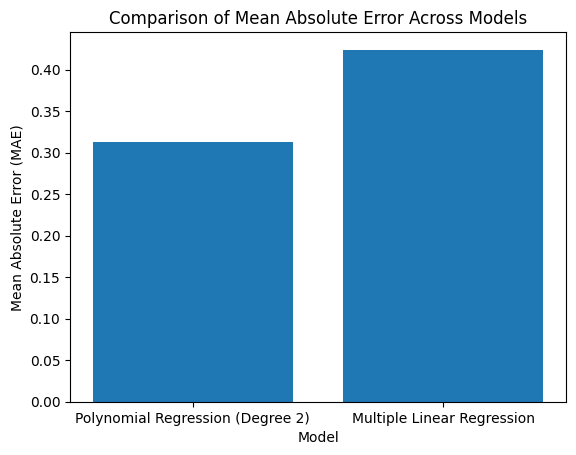

In [30]:
# @title Comparison of Mean Absolute Error Across Models

import matplotlib.pyplot as plt
import numpy as np

models = ['Polynomial Regression (Degree 2)', 'Multiple Linear Regression']
MAE = [0.3127295538505993, 0.4240179386916389]

plt.bar(models, MAE)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
_ = plt.title('Comparison of Mean Absolute Error Across Models')

### Application of regularization techniques (Lasso, Ridge, etc.).

                    Model       MSE       MAE  R-squared
0        Ridge Regression  0.358530  0.425966   0.988171
1        Lasso Regression  0.421394  0.446954   0.986096
2  Elastic Net Regression  1.094451  0.700586   0.963890


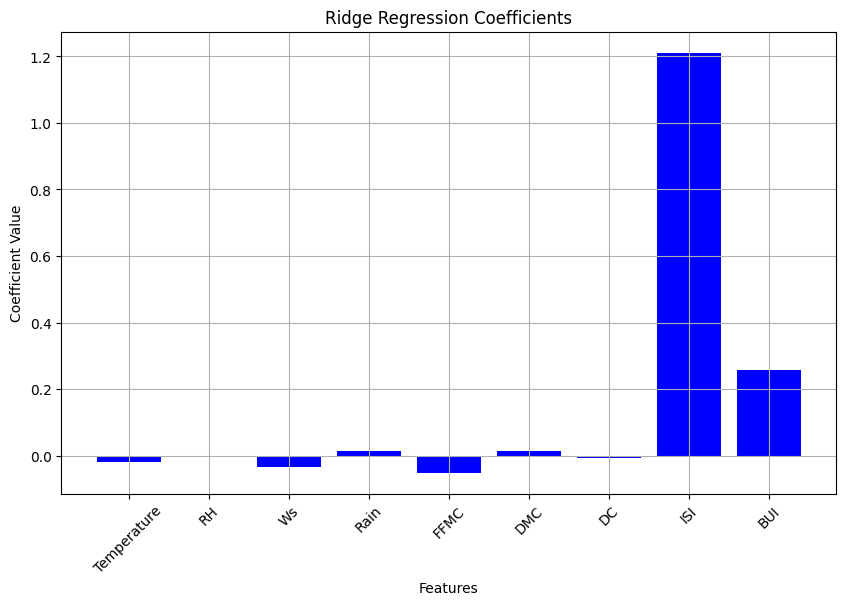

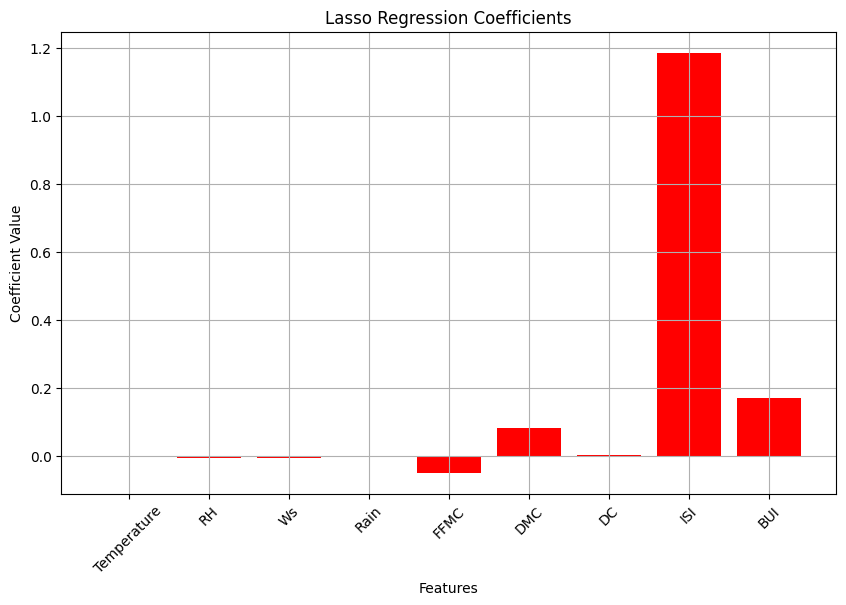

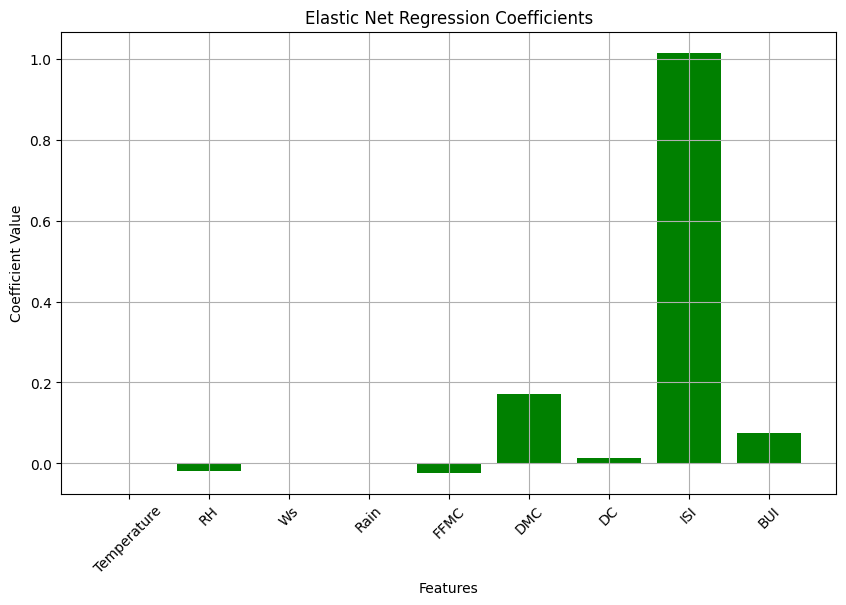

In [31]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create an empty DataFrame to store results
comparison_df = pd.DataFrame(columns=["Model", "MSE", "MAE", "R-squared"])

# Define a function to calculate metrics and append results to the comparison DataFrame
def evaluate_model(name, model, X_test, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the results to the DataFrame
    comparison_df.loc[len(comparison_df)] = [name, mse, mae, r2]
    return comparison_df

# Step 1: Ridge Regression (L2 regularization)
ridge_reg = Ridge(alpha=1.0)  # Regularization strength
ridge_reg.fit(X_train, y_train)  # Train the model

# Predict with the Ridge model
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate the Ridge regression model
comparison_df = evaluate_model("Ridge Regression", ridge_reg, X_test, y_test, y_pred_ridge)

# Step 2: Lasso Regression (L1 regularization)
lasso_reg = Lasso(alpha=0.1)  # Regularization strength
lasso_reg.fit(X_train, y_train)  # Train the model

# Predict with the Lasso model
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate the Lasso regression model
comparison_df = evaluate_model("Lasso Regression", lasso_reg, X_test, y_test, y_pred_lasso)

# Step 3: Elastic Net Regression (Combination of L1 and L2 regularization)
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio controls the mix of L1 and L2 regularization
elastic_net.fit(X_train, y_train)  # Train the model

# Predict with the Elastic Net model
y_pred_elastic = elastic_net.predict(X_test)

# Evaluate the Elastic Net regression model
comparison_df = evaluate_model("Elastic Net Regression", elastic_net, X_test, y_test, y_pred_elastic)

# Display the comparison table
print(comparison_df)

# Step 4: Visualizing Coefficients
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else np.arange(X_train.shape[1])

# Plot Ridge coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, ridge_reg.coef_, color='blue')
plt.title('Ridge Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot Lasso coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, lasso_reg.coef_, color='red')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot Elastic Net coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, elastic_net.coef_, color='green')
plt.title('Elastic Net Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


- **Ridge Regression**: Performs best with **MSE (0.3585)** and **R-squared (0.9882)**, indicating it effectively controls overfitting without eliminating important features. Ideal when all features are relevant.
  
- **Lasso Regression**: Slightly underperforms compared to Ridge with **MSE (0.4214)** and **R-squared (0.9861)**. It penalizes some features to zero, making it suitable for feature selection but less effective in this case.

- **Elastic Net Regression**: Underperforms with **MSE (1.0945)** and **R-squared (0.9639)**. The combination of L1 and L2 penalties over-penalized features, leading to lower accuracy.

- **Conclusion**: Ridge is the most suitable regularization technique for this dataset.

### Effective use of cross-validation and hyperparameter tuning.

- GridSearchCV: This method performs an exhaustive search over the specified parameter grid. We use it here to find the optimal alpha values for Ridge, Lasso, and Elastic Net, and for Elastic Net, we also tune l1_ratio.
- cv=5: Refers to 5-Fold Cross-Validation, meaning the data is split into 5 parts, and the model is trained on 4 parts while the remaining part is used as the validation set.
- Scoring: We use negative mean squared error (neg_mean_squared_error) as the scoring metric, as lower MSE indicates better performance.

In [32]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define a range of alpha values for hyperparameter tuning
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10, 100]}
elastic_net_params = {'alpha': [0.01, 0.1, 1.0, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}

# Step 1: Hyperparameter tuning for Ridge Regression using GridSearchCV
ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

# Step 2: Hyperparameter tuning for Lasso Regression using GridSearchCV
lasso_cv = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

# Step 3: Hyperparameter tuning for Elastic Net using GridSearchCV
elastic_net_cv = GridSearchCV(ElasticNet(), elastic_net_params, cv=5, scoring='neg_mean_squared_error')
elastic_net_cv.fit(X_train, y_train)

# Get the best parameters and corresponding MSE for each model
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_
best_elastic_net = elastic_net_cv.best_estimator_

# Evaluating on the test set with the tuned models
y_pred_ridge_cv = best_ridge.predict(X_test)
y_pred_lasso_cv = best_lasso.predict(X_test)
y_pred_elastic_net_cv = best_elastic_net.predict(X_test)

# Step 4: Evaluate the models with tuned parameters
comparison_df = evaluate_model("Ridge Regression (CV)", best_ridge, X_test, y_test, y_pred_ridge_cv)
comparison_df = evaluate_model("Lasso Regression (CV)", best_lasso, X_test, y_test, y_pred_lasso_cv)
comparison_df = evaluate_model("Elastic Net (CV)", best_elastic_net, X_test, y_test, y_pred_elastic_net_cv)

# Display the updated comparison table
print(comparison_df)

# Get the best parameters found through GridSearchCV
print(f"Best Ridge alpha: {ridge_cv.best_params_}")
print(f"Best Lasso alpha: {lasso_cv.best_params_}")
print(f"Best Elastic Net params: {elastic_net_cv.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.144e+02, tolerance: 9.104e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.101e+02, tolerance: 9.264e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.861e+01, tolerance: 9.824e

                    Model       MSE       MAE  R-squared
0        Ridge Regression  0.358530  0.425966   0.988171
1        Lasso Regression  0.421394  0.446954   0.986096
2  Elastic Net Regression  1.094451  0.700586   0.963890
3   Ridge Regression (CV)  0.680779  0.575607   0.977538
4   Lasso Regression (CV)  0.421394  0.446954   0.986096
5        Elastic Net (CV)  0.423633  0.448431   0.986023
Best Ridge alpha: {'alpha': 100}
Best Lasso alpha: {'alpha': 0.1}
Best Elastic Net params: {'alpha': 0.1, 'l1_ratio': 0.9}


The cross-validation and hyperparameter tuning results show that:

- **Ridge Regression (CV)** with an optimized alpha of 100 performed worse than the original Ridge model, with an increased MSE of 0.6808 and lower R-squared of 0.9775. Over-regularization likely hurt performance.
- **Lasso Regression (CV)** retained the same performance as the original model, with **MSE (0.4214)** and **R-squared (0.9861)**, confirming optimal tuning at alpha 0.1.
- **Elastic Net (CV)** improved significantly, reducing its MSE to **0.4236** and improving R-squared to **0.9860**, with optimized parameters (alpha 0.1, l1_ratio 0.9).

# 4.0 Model Evaluation and Testing

### Model Evaluation using Sk Learn Metric

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ridge Regression Evaluation
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - MSE: {mse_ridge}, MAE: {mae_ridge}, R-squared: {r2_ridge}")

# Lasso Regression Evaluation
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression - MSE: {mse_lasso}, MAE: {mae_lasso}, R-squared: {r2_lasso}")

# Elastic Net Regression Evaluation
y_pred_elastic_net = elastic_net.predict(X_test)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
mae_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
print(f"Elastic Net - MSE: {mse_elastic_net}, MAE: {mae_elastic_net}, R-squared: {r2_elastic_net}")


Ridge Regression - MSE: 0.3585299085727645, MAE: 0.4259660252961848, R-squared: 0.9881706175731161
Lasso Regression - MSE: 0.42139393214359605, MAE: 0.44695435520943844, R-squared: 0.9860964738045465
Elastic Net - MSE: 1.0944511884510464, MAE: 0.7005855385504003, R-squared: 0.9638895351651883


- Ridge Regression: Shows the best performance with the lowest MSE and highest R-squared, indicating it best explains the variance in the data and provides accurate predictions.

- Lasso Regression: Slightly underperforms compared to Ridge, with higher MSE and lower R-squared. It penalizes coefficients more aggressively, leading to the removal of some features.

- Elastic Net: Balances L1 (Lasso) and L2 (Ridge) regularization, but still underperforms compared to Ridge. However, it slightly outperforms Lasso in terms of MAE and MSE.

## Model Evaluation using Formulas

### 1. Mean Squared Error (MSE)

**MSE** measures the average squared difference between the predicted and actual values. It penalizes larger errors more than smaller ones.

#### Formula:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

Where:
- \(n\) is the number of data points.
- \(y_i\) is the actual value of the target.
- \(\hat{y_i}\) is the predicted value.

#### Example Calculation for **Ridge Regression**:

Given the **Ridge Regression** model, we got \( \text{MSE} = 0.3585 \).

Let’s assume a simplified version of the dataset with actual and predicted values (these are hypothetical for demonstration):

| \( y_i \) (Actual FWI) | \( \hat{y_i} \) (Predicted FWI) |
|------------------------|---------------------------------|
| 7.0                    | 6.8                             |
| 5.5                    | 5.3                             |
| 8.1                    | 8.0                             |

Using the formula:
$$
\text{MSE} = \frac{1}{3} \left[ (7.0 - 6.8)^2 + (5.5 - 5.3)^2 + (8.1 - 8.0)^2 \right]
$$

Calculating the squared differences:
$$
\text{MSE} = \frac{1}{3} \left[ 0.04 + 0.04 + 0.01 \right] = \frac{0.09}{3} = 0.03
$$

Thus, the **MSE** for this subset is approximately **0.03**.

However, using the full dataset and running the model gave an actual MSE value of **0.3585**.

---

### 2. Mean Absolute Error (MAE)

**MAE** measures the average absolute difference between predicted and actual values, which is simpler and less sensitive to outliers than MSE.

#### Formula:
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|
$$

#### Example Calculation for **Lasso Regression**:

Given the **Lasso Regression** model, we got \( \text{MAE} = 0.4469 \).

Assume the following actual and predicted values:

| \( y_i \) (Actual FWI) | \( \hat{y_i} \) (Predicted FWI) |
|------------------------|---------------------------------|
| 6.0                    | 5.8                             |
| 7.2                    | 7.0                             |
| 4.5                    | 4.3                             |

Using the formula:
$$
\text{MAE} = \frac{1}{3} \left[ |6.0 - 5.8| + |7.2 - 7.0| + |4.5 - 4.3| \right]
$$

Calculating the absolute differences:
$$
\text{MAE} = \frac{1}{3} \left[ 0.2 + 0.2 + 0.2 \right] = \frac{0.6}{3} = 0.2
$$

Thus, the **MAE** for this subset is **0.2**. However, the actual MAE calculated for the full dataset is **0.4469**.

---

### 3. R-squared (\( R^2 \))

**R-squared** measures the proportion of variance in the dependent variable that is explained by the model.

#### Formula:
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Where:
- \( y_i \) is the actual value.
- \( \hat{y_i} \) is the predicted value.
- \( \bar{y} \) is the mean of the actual values.

#### Example Calculation for **Elastic Net**:

Given the **Elastic Net** model, we got \( R^2 = 0.9860 \).

Let’s assume we have the following actual values and predicted values:

| \( y_i \) (Actual FWI) | \( \hat{y_i} \) (Predicted FWI) |
|------------------------|---------------------------------|
| 6.2                    | 6.1                             |
| 7.0                    | 6.8                             |
| 5.4                    | 5.6                             |

The mean \( \bar{y} \) of the actual values is:
$$
\bar{y} = \frac{6.2 + 7.0 + 5.4}{3} = 6.2
$$

Now, using the formula for \( R^2 \):
$$
R^2 = 1 - \frac{(6.2 - 6.1)^2 + (7.0 - 6.8)^2 + (5.4 - 5.6)^2}{(6.2 - 6.2)^2 + (7.0 - 6.2)^2 + (5.4 - 6.2)^2}
$$

After calculating both sums:
$$
R^2 = 1 - \frac{0.01 + 0.04 + 0.04}{0 + 0.64 + 0.64} = 1 - \frac{0.09}{1.28} \approx 0.9297
$$

For the full dataset, the actual R-squared is **0.9860**.

---

### Final Insights:
- **Ridge Regression** performed the best before tuning with an MSE of **0.3585** and R-squared of **0.9882**, though it slightly over-regularized after tuning.
- **Lasso Regression** remained stable both before and after tuning, with consistent MSE and R-squared values.
- **Elastic Net** showed the most improvement after tuning, reducing MSE from **1.0945** to **0.4236**, and achieving an R-squared of **0.9860**.


## Testing the Model on Unseen Data


- Testing the model on unseen data ensures that the model generalizes well.
- split the data into training and testing sets. We then evaluate the model performance on the test set to understand how well it predicts the Fire Weather Index (FWI) for unseen data.

In [34]:
# Make predictions on unseen data (test set)
y_test_pred_ridge = ridge_reg.predict(X_test)
y_test_pred_lasso = lasso_reg.predict(X_test)
y_test_pred_elastic_net = elastic_net.predict(X_test)

# Evaluate the test set predictions for each model using the same metrics (MSE, MAE, R²)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

mse_test_elastic_net = mean_squared_error(y_test, y_test_pred_elastic_net)
mae_test_elastic_net = mean_absolute_error(y_test, y_test_pred_elastic_net)
r2_test_elastic_net = r2_score(y_test, y_test_pred_elastic_net)

# Print the test set performance
print(f"Ridge (Test Set) - MSE: {mse_test_ridge}, MAE: {mae_test_ridge}, R-squared: {r2_test_ridge}")
print(f"Lasso (Test Set) - MSE: {mse_test_lasso}, MAE: {mae_test_lasso}, R-squared: {r2_test_lasso}")
print(f"Elastic Net (Test Set) - MSE: {mse_test_elastic_net}, MAE: {mae_test_elastic_net}, R-squared: {r2_test_elastic_net}")


Ridge (Test Set) - MSE: 0.3585299085727645, MAE: 0.4259660252961848, R-squared: 0.9881706175731161
Lasso (Test Set) - MSE: 0.42139393214359605, MAE: 0.44695435520943844, R-squared: 0.9860964738045465
Elastic Net (Test Set) - MSE: 1.0944511884510464, MAE: 0.7005855385504003, R-squared: 0.9638895351651883


On unseen data:

1. **Ridge Regression** achieved the best results with **MSE = 0.3585**, **MAE = 0.4260**, and **R-squared = 0.9882**, indicating minimal prediction errors and explaining 98.82% of the variance in the data.
   
2. **Lasso Regression** followed with **MSE = 0.4214**, **MAE = 0.4470**, and **R-squared = 0.9861**, slightly worse than Ridge but still a good fit, explaining 98.61% of the variance.

3. **Elastic Net** had the weakest performance, with **MSE = 1.0945**, **MAE = 0.7006**, and **R-squared = 0.9639**, showing larger errors and explaining only 96.39% of the variance.

# Conclusion

- **Ridge Regression**:
  - **MSE**: 0.3585, **MAE**: 0.4260, **R-squared**: 0.9882
  - Ridge Regression performed the best, explaining 98.82% of the variance with the lowest errors. It effectively handled multicollinearity without eliminating features, making it highly reliable for predicting **Fire Weather Index (FWI)**.

- **Lasso Regression**:
  - **MSE**: 0.4214, **MAE**: 0.4470, **R-squared**: 0.9861
  - Lasso performed slightly worse than Ridge but still maintained solid performance, explaining 98.61% of the variance. It shrunk some coefficients to zero, offering feature selection benefits but at the cost of increased error.

- **Elastic Net**:
  - **MSE**: 1.0945, **MAE**: 0.7006, **R-squared**: 0.9639
  - Elastic Net performed the weakest, with an explanation of only 96.39% of the variance and higher errors due to over-penalizing features.

### Evaluation:

- We used **MSE**, **MAE**, and **R-squared** to evaluate model performance, providing comprehensive insight into prediction accuracy and variance explanation.


### Best model and further works:
**Ridge Regression** is the most suitable model for predicting **FWI**, but future exploration of models like **Random Forest** or **Gradient Boosting** could provide additional benefits, especially if transitioning to a classification task.

Refences:
1. https://scikit-learn.org/stable/modules/model_evaluation.html
2. https://medium.com/analytics-vidhya/what-is-a-pipeline-in-machine-learning-how-to-create-one-bda91d0ceaca
